In [1]:
import json
import pandas as pd
import os

In [4]:
root_path = os.path.join('..', '..')
root_path

'..\\..'

In [5]:
def readData(filename):
    with open(filename,'r+') as file:
        dataset  = json.load(file)
    return dataset

In [6]:
data = readData(os.path.join(root_path, 'MSR_data_cleaned.json'))

In [7]:
df = pd.DataFrame(data)

In [8]:
df.index

Index(['', 'Access Gained', 'Attack Origin', 'Authentication Required',
       'Availability', 'CVE ID', 'CVE Page', 'CWE ID', 'Complexity',
       'Confidentiality', 'Integrity', 'Known Exploits', 'Publish Date',
       'Score', 'Summary', 'Update Date', 'Vulnerability Classification',
       'add_lines', 'codeLink', 'commit_id', 'commit_message', 'del_lines',
       'file_name', 'files_changed', 'func_after', 'func_before', 'lang',
       'lines_after', 'lines_before', 'parentID', 'patch', 'project',
       'project_after', 'project_before', 'vul', 'vul_func_with_fix'],
      dtype='object')

In [9]:
transposed_df = df.transpose()

In [10]:
columns_to_keep = ["vul", "lang", "project", "func_after", "func_before", "vul_func_with_fix", "Score", "Vulnerability Classification", "lines_after", "lines_before"]

# Keep only the specified columns
df_subset = transposed_df[columns_to_keep]

In [42]:
# columns_to_keep = ["project", "lang", "vul", "func_after", "func_before"]

# # Keep only the specified columns
# df_subset = df_subset[columns_to_keep]

In [11]:
df_subset

,vul,lang,project,func_after,func_before,vul_func_with_fix,Score,Vulnerability Classification,lines_after,lines_before
0,0,C,samba,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,6.0,Bypass,,
1,0,C,samba,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,6.0,Bypass,,
2,0,C,samba,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,6.0,Bypass,,
3,0,C,samba,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,6.0,Bypass,,
4,0,C,samba,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,6.0,Bypass,,
...,...,...,...,...,...,...,...,...,...,...
188631,1,C,Android,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,10.0,DoS Exec Code Overflow Mem. Corr.,WORD32 impeg2d_dec_p_mb_params(dec_state_t *p...,
188632,1,C,Android,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,10.0,DoS Exec Code Overflow Mem. Corr.,WORD32 impeg2d_dec_pnb_mb_params(dec_state_t *...,
188633,1,C,Android,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...,4.3,+Info,if (param2 < 0 || param2 >= NUM_EQ_BAN...,if (param2 >= NUM_EQ_BANDS) {\n ...
188634,1,C,Android,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",7.8,,\n eal = *(p_data)&RFCOMM_EA;\n len = *(p_da...,"RFCOMM_PARSE_LEN_FIELD(eal, len, p_data);\n"


<Axes: >

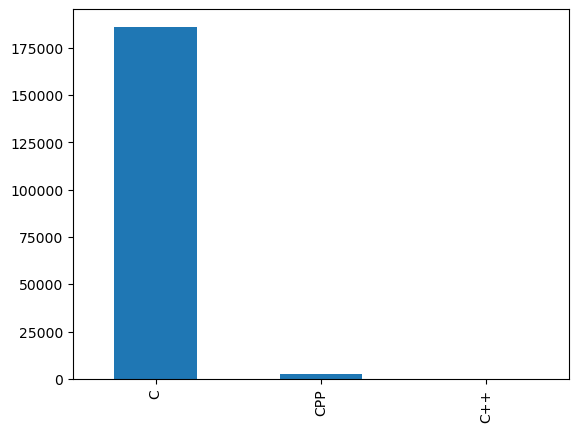

In [12]:
df_subset['lang'].value_counts(normalize = False).plot.bar()

<Axes: >

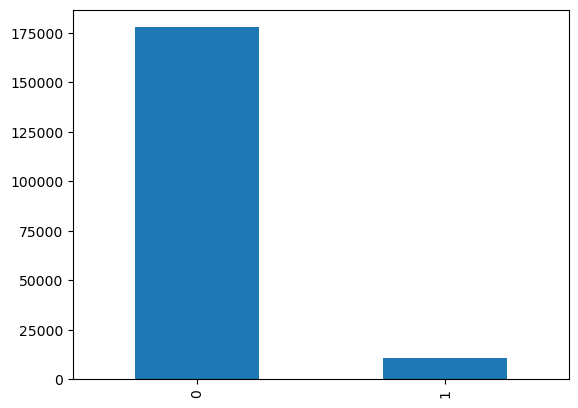

In [13]:
df_subset['vul'].value_counts(normalize = False).plot.bar()

In [16]:
print(df_subset["project"].value_counts())

Chrome         77173
linux          46855
Android         8691
qemu            3096
php             2709
               ...  
libbsd             1
libICE             1
torque             1
yodl               1
libtomcrypt        1
Name: project, Length: 310, dtype: int64


In [21]:
print(df_subset["Vulnerability Classification"].value_counts())

                                   55916
DoS                                49000
DoS Overflow                       13333
+Info                              10192
Bypass                              8549
                                   ...  
DoS Exec Code Mem. Corr. Bypass        8
Overflow +Info                         7
Dir. Trav. Bypass                      4
Exec Code Mem. Corr. +Info             3
Exec Code XSS                          2
Name: Vulnerability Classification, Length: 76, dtype: int64


In [22]:
df_subset.to_csv(os.path.join('..', "data", 'full_dataset.csv'), index=False)